In [1]:
import numpy as np
import pandas as pd
import pickle
from utils.plot_keypoints import show_keypoints
from utils.feature_extraction import transform_data
from utils.jsonHandler import read_json_files

In [2]:
file_path = "Videos"
json_data = read_json_files(file_path)

In [16]:
num_clusters = 4

In [17]:
with open('models/kmeans_model.pkl', 'rb') as file:
    kmeans_model = pickle.load(file)

In [18]:
angle_fb_data = pd.read_csv("data/angle_full_body.csv")
fb_data = pd.read_csv("data/no_dup_full_body.csv")

In [19]:
cluster_samples = [[] for _ in range(num_clusters)]

In [20]:
for i, cluster_id in enumerate(kmeans_model.labels_):
    cluster_samples[cluster_id].append(fb_data.loc[i])

In [21]:
# Cluster 0: 40
# Cluster 1: 42
# Cluster 2: 38
# Cluster 3: 40
np.random.seed(40)

In [22]:
samples_per_cluster = 3
selected_samples = []

In [23]:
#for cluster_id in range(num_clusters):
#    cluster_samples_indices = np.where(kmeans_model.labels_ == cluster_id)[0]
#    random_sample_indices = np.random.choice(cluster_samples_indices, samples_per_cluster, replace=False)
#    selected_samples.extend(fb_data.values[random_sample_indices])

In [24]:
cluster_samples_indices = np.where(kmeans_model.labels_ == 3)[0]
random_sample_indices = np.random.choice(cluster_samples_indices, samples_per_cluster, replace=False)
selected_samples.extend(fb_data.values[random_sample_indices])

In [25]:
samples_frames = []

In [26]:
for cp in selected_samples: 
    found_condition = False
    for key in json_data:
        for item in json_data[key]:
            frame_index = item["frame"]
            predictions = item["predictions"]
            for prediction in predictions:
                keypoints = prediction["keypoints"]
                bbox = prediction["bbox"]
                score = prediction["score"]
                category_id = prediction["category_id"]

                keypoints_arr = np.array(keypoints).reshape(-1, 3)  # Reshape keypoints as (n, 3) array
                c_values = keypoints_arr[:, 2]  # Extract all c values
                keypoints_without_c = keypoints_arr[:, :2].reshape(-1,34)
                
                if np.allclose(keypoints_without_c, cp):
                    print(key, frame_index)
                    #print(keypoints_without_c)
                    samples_frames.append([key, frame_index, keypoints_without_c])
                    found_condition = True
                    break
            if found_condition:
                break
        if found_condition:
            break

How to make stress your friend  Kelly McGonigal.mp4.openpifpaf.json 2106
Looks arent everything Believe me Im a model Cameron Russell.mp4.openpifpaf.json 3643
The puzzle of motivation  Dan Pink.mp4.openpifpaf.json 6147


In [27]:
import cv2
import matplotlib.pyplot as plt

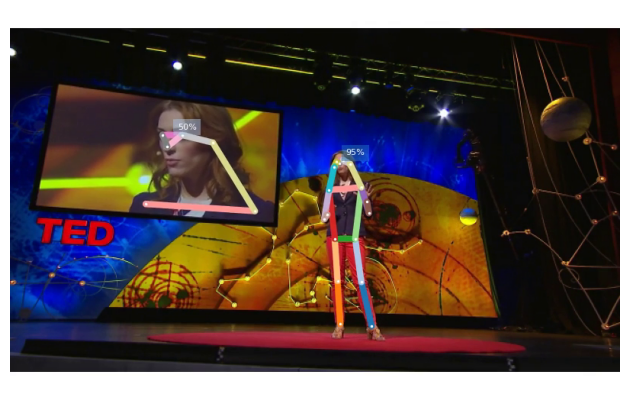

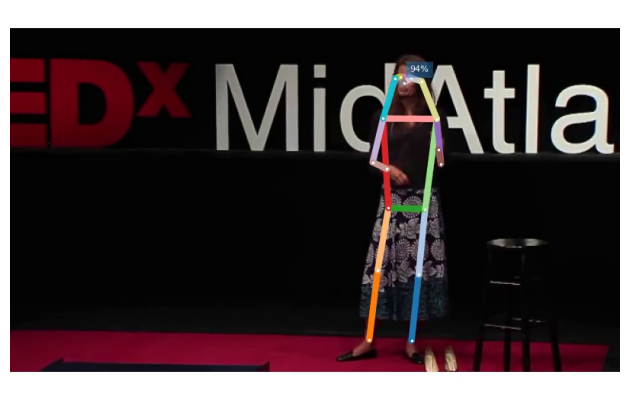

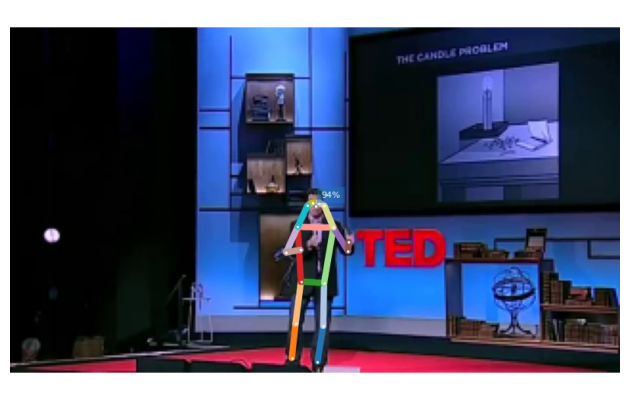

In [28]:
for i in range(len(samples_frames)):
    video_name = samples_frames[i][0].rsplit('.', 1)[0]
    video_path = f'Videos/{video_name}.mp4'

    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print("Error opening video file")
        exit()

    target_frame_number = samples_frames[i][1]-1

    cap.set(cv2.CAP_PROP_POS_FRAMES, target_frame_number)
    ret, frame = cap.read()

    if not ret:
        print("Error reading frame")
        exit()

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    plt.imshow(frame_rgb)
    plt.axis('off')  # Turn off axis labels and ticks
    cv2.imwrite(f"Results/Samples/Sample-{i+1}.jpg", frame)
    #plt.savefig(f"Results/Samples/Sample-{i+1}.jpg", bbox_inches='tight', pad_inches=0)
    plt.tight_layout()
    #plt.show()
    cap.release()

    keypoints = samples_frames[i][2].reshape(17,2)
    show_keypoints(keypoints, save_path=f"Results/Samples/Sample-{i+1}-Keypoints.jpg", show=False)